In [11]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib
import numpy as np
import os
import pandas as pd


In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util

In [3]:
nx = 640
ny = 360

In [4]:
net = unet.Unet(channels=3, n_class=2, layers=5, features_root=16, cost_kwargs=dict(class_weights=[1,2]))

2017-10-02 14:13:43,659 Layers 5, features 16, filter size 3x3, pool size: 2x2


## Generation of qualitative flow plots


In [5]:
data = net.predictAll(
    model_path="./unet_trained/model.cpkt", 
    images_path='F:/MOY_PhD_DATA_LOCAL/2017_watsen/data/frames')

Number of files used: 18497
INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2017-10-02 14:13:48,099 Restoring parameters from ./unet_trained/model.cpkt
2017-10-02 14:13:49,009 Model restored from file: ./unet_trained/model.cpkt


In [13]:
import pandas as pd
dattt = pd.DataFrame({
    'time':data['time'] , 
    'sensor':data['sensor'] , 
    'p6':data['watsen']['0.6'],
    
    'p7':data['watsen']['0.7'],
    'p8':data['watsen']['0.8'],
    'p9':data['watsen']['0.9'],
})


# dattt.to_csv("output.csv")
    
    

<function matplotlib.pyplot.show>

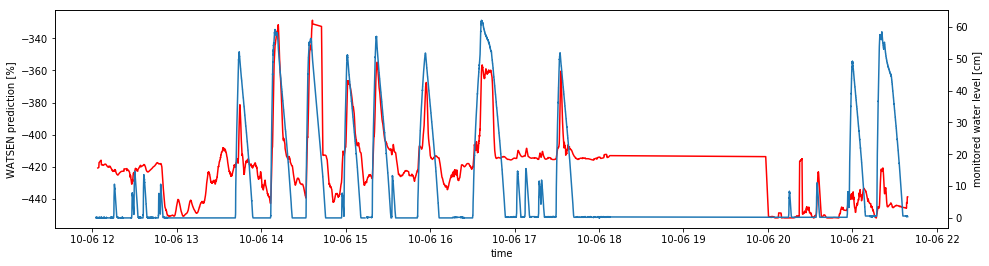

In [28]:
fig, ax1 = plt.subplots(figsize=(16, 4))
ax1.plot(dattt['time'], -dattt['p8'].rolling(60).mean(), 'r')

ax2=ax1.twinx()
ax2.plot(dattt['time'], dattt['sensor'])


ax1.set_xlabel('time')
ax1.set_ylabel('WATSEN prediction [%]')
ax2.set_ylabel('monitored water level [cm]')
plt.show